# <center>Top 50 Spotify Tracks of 2020 analysis</center>

## <center>Introduction</center>

Welcome to Top 50 spotify tracks of 2020 analysis. This notebook is focused on showing knowgladge related to data analysis, linear algebra, NumPy, and Pandas while conducting analysis. For our task we got list of questions which need to be answered:<br>  
1. How many observations are there in this dataset?<br>
2. How many features this dataset has?<br>  
3. Which of the features are categorical?<br>  
4. Which of the features are numeric?<br>  
5. Are there any artists that have more than 1 popular track? If yes, which and how many?<br>  
6. Who was the most popular artist?<br>
7. How many artists in total have their songs in the top 50?<br>
8. Are there any albums that have more than 1 popular track? If yes, which and how many?<br>
9. How many albums in total have their songs in the top 50?<br>
10. Which tracks have a danceability score above 0.7?<br>
11. Which tracks have a danceability score below 0.4?<br>
12. Which tracks have their loudness above -5?<br>
13. Which tracks have their loudness below -8?<br>
14. Which track is the longest?<br>
15. Which track is the shortest?<br>
16. Which genre is the most popular?<br>
17. Which genres have just one song on the top 50?<br>
18. How many genres in total are represented in the top 50?<br>
19. Which features are strongly positively correlated?<br>
20. Which features are strongly negatively correlated?<br>
21. Which features are not correlated?<br>
22. How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?<br>
23. How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?<br>
24. How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?<br>

Overall objective of this analysis is to find interesting insights into what makes song popular.

## <center>Import Libraries</center>

In this analysis, we use 3 types of libraries. **Numpy** and __Pandas__ are used for data manipulations, __matplot__ and __seaborn__ are used for ploting and __scipy__ is used to find needed correlations. Also, __warnings__ library is used but its only purpose is to hide not meaningful warning messages.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings

## <center>Load the Dataset<center>

For this analysis we are using **Top 50 Spotify Tracks of 2020** dataset that can be found on [Kaggle](https://www.kaggle.com/datasets/atillacolak/top-50-spotify-tracks-2020).

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
spotify_data= pd.read_csv('datasets/spotifytoptracks.csv')
spotify_data.head()

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


## <center>Data cleaning<center>

### <center> Renaming ambigious column names <center>

Our current dataset has ambigiously names collumn "Unnaamed: 0" which basicly contains index values. For this reason column is renamed Id.

In [3]:
spotify_data.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
spotify_data.head()

,Id,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


### <center> removing redundant columns and seting new index<center>

At this stage dataset has 2 columns containing indexing values, for this reason we are setting "Id" as indexing column and drop default one from the dataset. Also "track_id" is being removed, because they have no purpouse in our analysis.

In [4]:
spotify_data.set_index('Id', drop=True, inplace=True)
spotify_data.drop('track_id', axis=1, inplace=True)
spotify_data.head(n=10)

,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
Id,,,,,,,,,,,,,,,
0,The Weeknd,After Hours,Blinding Lights,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco
5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),0.690,0.746,11,-7.956,0.24700,0.1640,0.000000,0.1010,0.497,89.977,181733,Hip-Hop/Rap
6,Harry Styles,Fine Line,Watermelon Sugar,0.816,0.548,0,-4.209,0.12200,0.0465,0.000000,0.3350,0.557,95.390,174000,Pop
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),0.431,0.726,8,-8.765,0.73100,0.1350,0.000000,0.6960,0.348,144.026,173333,Hip-Hop/Rap
8,Trevor Daniel,Nicotine,Falling,0.430,0.784,10,-8.756,0.12300,0.0364,0.000000,0.0887,0.236,127.087,159382,R&B/Hip-Hop alternative


### <center> Data value, type, outlier checks <center>

During data cleaning, first we check if there are null values in given dataset.

In [5]:
spotify_data.isnull().sum()

artist              0
album               0
track_name          0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

As we can see there are no null values. Next we check if all of the 50 songs in this dataset are unique.

In [6]:
print(len(spotify_data["track_name"].unique()))

50


Next we check if our dataset has correct data types.

In [7]:
spotify_data.dtypes

artist               object
album                object
track_name           object
energy              float64
danceability        float64
key                   int64
loudness            float64
acousticness        float64
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
genre                object
dtype: object

While looking for outliers we use dataset's **description** and **zscore**. Descriptions give good overall overview of the dataset and zscore detects datapoints with extreme deviations.

In [8]:
spotify_data.describe()

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


In [9]:
z_scores = zscore(spotify_data[['energy', 'danceability', 'loudness', 'acousticness', 'speechiness',
                                'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms' ]])
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
outlier_data = spotify_data.loc[outliers, spotify_data.columns.difference(['genre'])]

print(outlier_data)

Empty DataFrame
Columns: [acousticness, album, artist, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, speechiness, tempo, track_name, valence]
Index: []


### <center> Text formating <center>

During text formating we do few manipulations to make data more readable. Artists names are capitalized as per "title" style. Album names and track names are simply capitalized, and finaly we split text in genre category using backslash (/) and space ( ) as split indicators.

In [10]:
spotify_data['artist'] = spotify_data['artist'].apply(lambda x: x.title())
spotify_data['album'] = spotify_data['album'].str.capitalize()
spotify_data['track_name'] = spotify_data['track_name'].str.capitalize()
spotify_data = spotify_data.map(lambda x: x.strip() if isinstance(x, str) else x)
print(spotify_data.duplicated().sum())
spotify_data['genre']= spotify_data['genre'].str.split(r'/|\s+')
spotify_data['genre']= spotify_data['genre'].apply(lambda genres: [genre.capitalize() for genre in genres])
spotify_data.head()


0


,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
Id,,,,,,,,,,,,,,,
0,The Weeknd,After hours,Blinding lights,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,"[R&b, Soul]"
1,Tones And I,Dance monkey,Dance monkey,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,"[Alternative, Indie]"
2,Roddy Ricch,Please excuse me for being antisocial,The box,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,"[Hip-hop, Rap]"
3,Saint Jhn,Roses (imanbek remix),Roses - imanbek remix,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,"[Dance, Electronic]"
4,Dua Lipa,Future nostalgia,Don't start now,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,[Nu-disco]


## <center>Exploratory data analysis <center>

### <center>How many observations are there in this dataset? <center>

During analysis, first thing we check is our dataset shape. This indicates our dataset dimension which offer information on observation and feature count.

In [11]:
spotify_data.shape

(50, 15)

As we can see in output below, in this dataset there are <span style="color:red; font-weight:bold;">50</span> observations, which is expected considering dataset is made of top 50 tracks of 2020.

In [12]:
spotify_data.shape[0]

50

### <center>How many features this dataset has?<center>

Output below offers us insights into dataset feature count. As we can see there are <span style="color:red; font-weight:bold;">15</span> features in total.

In [13]:
spotify_data.shape[1]

15

### <center>Which of the features are categorical?<center>

After finding out information about observations and features, we need to extract datatype of each feature. For text fields its expected to be object type feature, while for all numerical fields it should be float or intager data type.

In [14]:
spotify_data.dtypes

artist               object
album                object
track_name           object
energy              float64
danceability        float64
key                   int64
loudness            float64
acousticness        float64
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
genre                object
dtype: object

For easier readabilaty, series containing datatypes are split into numerical and categorical. In categorical features we have <span style="color:red; font-weight:bold;">**artist, album, track_name, genre**</span>

In [15]:
categorical_columns = spotify_data.select_dtypes(include=['object']).dtypes
categorical_columns

artist        object
album         object
track_name    object
genre         object
dtype: object

### <center>Which of the features are numeric?<center>

As we can see from output below these features are numerical: <span style="color:red; font-weight:bold;">**energy, danceability, key, loudness, acousticness, speechiness, instrumentalness, liveness, valence, tempo, duration_ms.**</span>

In [16]:
numerical_columns = spotify_data.select_dtypes(include=[np.number]).dtypes
numerical_columns

energy              float64
danceability        float64
key                   int64
loudness            float64
acousticness        float64
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
dtype: object

### <center> Are there any artists that have more than 1 popular track? If yes, which and how many? <center>

Now as we got our main info about dataset structure we can start analysis. First lets see if there are artists that have multiple top songs and if yes how many.

In [17]:
spotify_data['artist'].value_counts()

artist
Billie Eilish      3
Dua Lipa           3
Travis Scott       3
Justin Bieber      2
Harry Styles       2
Lewis Capaldi      2
Post Malone        2
Cardi B            1
Surfaces           1
Eminem             1
Bts                1
Benee              1
Surf Mesa          1
Lady Gaga          1
The Weeknd         1
Shawn Mendes       1
Regard             1
Black Eyed Peas    1
The Scotts         1
Bad Bunny          1
Juice Wrld         1
Ariana Grande      1
Maluma             1
Topic              1
24Kgoldn           1
Tones And I        1
Jawsh 685          1
Future             1
Maroon 5           1
Doja Cat           1
Drake              1
Lil Mosey          1
Arizona Zervas     1
Karol G            1
Trevor Daniel      1
Powfu              1
Dababy             1
Saint Jhn          1
Roddy Ricch        1
Jp Saxe            1
Name: count, dtype: int64

As we can see there are few artists with more than one song in top's. After filtering them we can see that <span style="color:red; font-weight:bold;">**Billie Eilish, Dua Lipa and Travis Scott**</span> each have 3 top songs, while <span style="color:red; font-weight:bold;">**Justin Bieber, Harry Styles, Lewis Capaldi**</span> and <span style="color:red; font-weight:bold;">**Post Malone**</span> have 2 songs in top 50.

In [18]:
multi_top_artists= spotify_data['artist'].value_counts()[spotify_data['artist'].value_counts().ge(2)]  # ge - greater or equal
multi_top_artists

artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Justin Bieber    2
Harry Styles     2
Lewis Capaldi    2
Post Malone      2
Name: count, dtype: int64

In total there are <span style="color:red; font-weight:bold;">**7**</span> artists that have more than one song in top 50.

In [19]:
len(multi_top_artists)

7

### <center>Who was the most popular artist?<center>

While we get to know artists that have multiple songs in top 50, we still dont know which one is most popular. To give definitive answer we would need bit more extensive dataset, but using data we got, its safe to say that <span style="color:red; font-weight:bold;">**Billie Eilish, Dua Lipa**</span> and <span style="color:red; font-weight:bold;">**Travis Scott**</span> were most popular artists in 2020.

In [20]:
most_popular_artists = spotify_data['artist'].value_counts().loc[lambda x: x == x.max()]
most_popular_artists

artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Name: count, dtype: int64

### <center>How many artists in total have their songs in the top 50?<center>

Considering the fact that some artists have multiple popular songs, we may be interested to know how many unique artists there are in this dataset. From code below we can see that there are total of <span style="color:red; font-weight:bold;">**40**</span> unique artists in this dataset.

In [21]:
unique_artists = spotify_data['artist'].unique()
len(unique_artists)

40

### <center>Are there any albums that have more than 1 popular track? If yes, which and how many?<center>

After getting insights into artists, next logical step is to cover some basic question related to albums. First lets see how many albums have multiple top songs.

In [22]:
spotify_data['album'].value_counts()

album
Future nostalgia                                              3
Hollywood's bleeding                                          2
Fine line                                                     2
Changes                                                       2
Ride it                                                       1
Where the light is                                            1
Music to be murdered by                                       1
Dynamite (daytime version)                                    1
Hey u x                                                       1
Ily (i love you baby) (feat. emilee)                          1
Chromatica                                                    1
Highest in the room                                           1
Papi juancho                                                  1
After hours                                                   1
When we all fall asleep, where do we go?                      1
Birds in the trap sing mcknight   

From code below we can see that there are in total <span style="color:red; font-weight:bold;">**4**</span> albums in dataset that contain 2 or more songs: <span style="color:red; font-weight:bold;">**Future nostalgia, Hollywood's bleeding, Fine line, Changes**</span>. One of them called <span style="color:red; font-weight:bold;">**"Future nostalgia"**</span> has 3 songs in top charts and is most popular in our dataset. 

In [23]:
multi_top_albums= spotify_data['album'].value_counts()[spotify_data['album'].value_counts().ge(2)]
multi_top_albums

album
Future nostalgia        3
Hollywood's bleeding    2
Fine line               2
Changes                 2
Name: count, dtype: int64

### <center> How many albums in total have their songs in the top 50?<center>

Just like with artists, its usefull to know how many unique albums there are in dataset. From code below we can see that there are <span style="color:red; font-weight:bold;">**45**</span> unique albums in dataset.

In [24]:
unique_albums = spotify_data['album'].unique()
len(unique_albums)

45

### <center>Which tracks have a danceability score above 0.7?<center>

Next up lets explore some features that may have influenced popularity of songs. First up lets filter out songs with danceabilaty score above 0.7. As we can see in list below, there are <span style="color:red; font-weight:bold;">**32**</span> songs in top 50 that have danceabilaty score higher than 0.7.

In [25]:
high_danceability_tracks = spotify_data[spotify_data['danceability'].gt(0.7)]

print(len(high_danceability_tracks))

high_danceability_tracks[['artist', 'track_name', 'danceability']]  # Aditional filtering for readabilaty

32


,artist,track_name,danceability
Id,,,
1,Tones And I,Dance monkey,0.825
2,Roddy Ricch,The box,0.896
3,Saint Jhn,Roses - imanbek remix,0.785
4,Dua Lipa,Don't start now,0.793
5,Dababy,Rockstar (feat. roddy ricch),0.746
7,Powfu,Death bed (coffee for your head),0.726
8,Trevor Daniel,Falling,0.784
10,Karol G,Tusa,0.803
13,Lil Mosey,Blueberry faygo,0.774


### <center>Which tracks have a danceability score below 0.4?<center>

After filtering songs with low danceabilaty we can see that there is only <span style="color:red; font-weight:bold;">**1**</span> song with daceabilaty score lower than 0.4. Considering data we got before (Danceabilaty mean being ~0.71, and 32 songs being above that threshold) there is some basis for hypothesis that songs danceabilaty may strongly influence songs abilaty to become top 50. 

In [26]:
low_danceability_tracks = spotify_data[spotify_data['danceability'].lt(0.4)]
print(len(low_danceability_tracks))
low_danceability_tracks[['artist', 'track_name', 'danceability']]

1


,artist,track_name,danceability
Id,,,
44,Billie Eilish,Lovely (with khalid),0.351


### <center>Which tracks have their loudness above -5?<center>

Similar filtering can be applied to loudness. Using code below we can see that in total there are <span style="color:red; font-weight:bold;">**19**</span> songs that have loudness of more than -5.

In [27]:
high_loudness = spotify_data[spotify_data['loudness'].gt(-5)]
print(len(high_loudness))
high_loudness[['artist', 'track_name', 'loudness']]

19


,artist,track_name,loudness
Id,,,
4,Dua Lipa,Don't start now,-4.521
6,Harry Styles,Watermelon sugar,-4.209
10,Karol G,Tusa,-3.280
12,Post Malone,Circles,-3.497
16,Lewis Capaldi,Before you go,-4.858
17,Doja Cat,Say so,-4.577
21,Harry Styles,Adore you,-3.675
23,24Kgoldn,Mood (feat. iann dior),-3.558
31,Dua Lipa,Break my heart,-3.434


### <center>Which tracks have their loudness below -8?<center>

When we check for less loud songs ( loudness lower than -8), we see that there are <span style="color:red; font-weight:bold;">**9**</span> songs. This may imply that songs loudness have less correlation with it being popular than danceabilaty, but to prove this hipothesis more extensive research must be conducted.

In [28]:
low_loudness = spotify_data[spotify_data['loudness'].lt(-8)]
print(len(low_loudness))
low_loudness[['artist', 'track_name', 'loudness']]

9


,artist,track_name,loudness
Id,,,
7,Powfu,Death bed (coffee for your head),-8.765
8,Trevor Daniel,Falling,-8.756
15,Drake,Toosie slide,-8.820
20,Jawsh 685,Savage love (laxed - siren beat),-8.520
24,Billie Eilish,Everything i wanted,-14.454
26,Billie Eilish,Bad guy,-10.965
36,Travis Scott,Highest in the room,-8.764
44,Billie Eilish,Lovely (with khalid),-10.109
47,Jp Saxe,If the world was ending - feat. julia michaels,-10.086


### <center>Which track is the longest?<center>

Song duration also may give some usefull insights, for that reason using code below we can check longest and shortest songs. 

In [29]:
spotify_data.loc[spotify_data['duration_ms'].idxmax()]

artist                Travis Scott
album                   Astroworld
track_name              Sicko mode
energy                        0.73
danceability                 0.834
key                              8
loudness                    -3.714
acousticness               0.00513
speechiness                  0.222
instrumentalness               0.0
liveness                     0.124
valence                      0.446
tempo                      155.008
duration_ms                 312820
genre               [Hip-hop, Rap]
Name: 49, dtype: object

### <center>Which track is the shortest?<center>

In [30]:
spotify_data.loc[spotify_data['duration_ms'].idxmin()]

artist                            24Kgoldn
album               Mood (feat. iann dior)
track_name          Mood (feat. iann dior)
energy                               0.722
danceability                           0.7
key                                      7
loudness                            -3.558
acousticness                         0.221
speechiness                         0.0369
instrumentalness                       0.0
liveness                             0.272
valence                              0.756
tempo                               90.989
duration_ms                         140526
genre                           [Pop, Rap]
Name: 23, dtype: object

### <center>Which genre is the most popular?<center>

Original dataset's feature "genre" is quite ambigious. For this reason genre related analysis may have some discrepancies, but in our case after quick filtering we can see that the most popular genre is <span style="color:red; font-weight:bold;">Pop</span> genre, which has <span style="color:red; font-weight:bold;">17</span> songs belonging to it.


In [31]:
exploded_data = spotify_data.explode('genre')
genre_counts = exploded_data['genre'].value_counts()
genre_counts


genre
Pop             17
Hip-hop         16
Rap             14
Alternative      6
Dance            5
Electronic       5
R&b              4
Indie            4
Soul             2
Electro-pop      2
Disco            1
Experimental     1
Reggaeton        1
Dreampop         1
Disco-pop        1
Soft             1
Dance-pop        1
Trap             1
Rock             1
Nu-disco         1
Chamber          1
Name: count, dtype: int64

### <center>Which genres have just one song on the top 50?<center>

In case we are interested in ganres that have only 1 song in top 50, we can filter them out with code below.

In [32]:
single_song_genres = genre_counts[genre_counts.eq(1)]
single_song_genres

genre
Disco           1
Experimental    1
Reggaeton       1
Dreampop        1
Disco-pop       1
Soft            1
Dance-pop       1
Trap            1
Rock            1
Nu-disco        1
Chamber         1
Name: count, dtype: int64

### <center>How many genres in total are represented in the top 50?<center>

In [33]:
print(f"In total, there are {len(genre_counts)} music genres in this dataset.")

In total, there are 21 music genres in this dataset.


### <center> Overall data correlation map <center>

One of the most important questions for analysis of top 50 songs is: What makes song popular? To get insights that may help finding out answer its a good idea to check for feature correlation. Using code below we can plot a heatmap that shows correlations between all of the numerical features in our dataset.

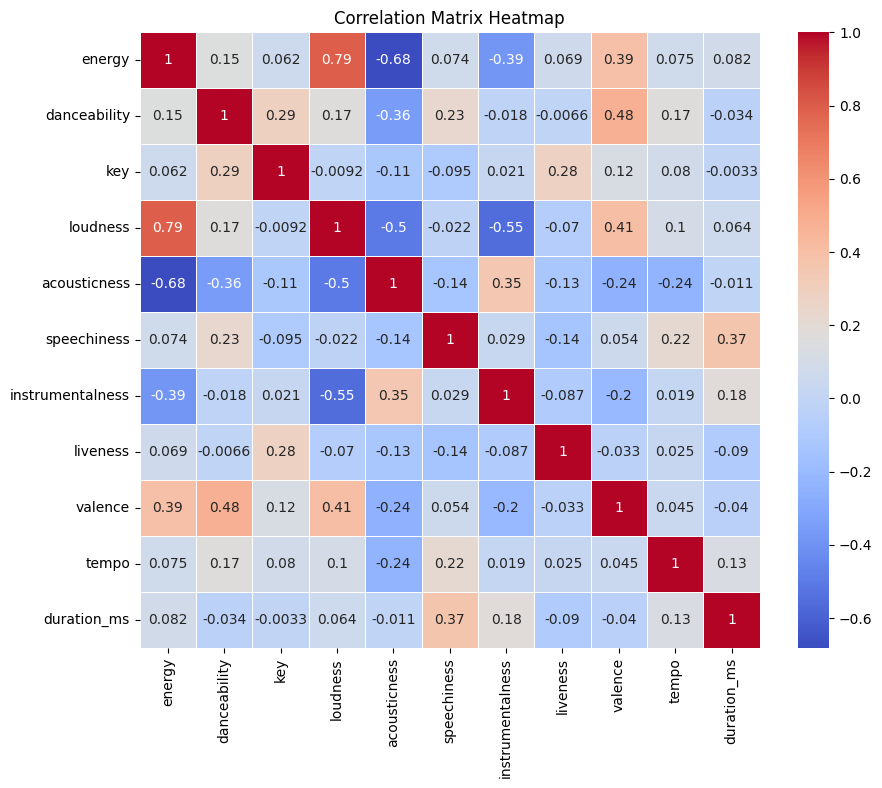

In [34]:
correlation_matrix = spotify_data[['energy', 'danceability', 'key', 'loudness', 'acousticness','speechiness',          # Choosing only numeric fields
                                   'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### <center>Which features are strongly positively correlated?<center>

From heatmap above and aditional filtering below we can see that <span style="color:red; font-weight:bold;">**energy**</span> and <span style="color:red; font-weight:bold;">**loudness**</span> is strongly correlated (we consider features strongly correlated if their correlation value > 0,5). This just affirms notion that more energetic songs are louder.

In [35]:
filtered_positive_correlation = correlation_matrix[(correlation_matrix.gt(0.5)) &(correlation_matrix.ne(1))]
positive_correlation_series = filtered_positive_correlation.stack()
positive_correlation_series[positive_correlation_series.notnull()]

energy    loudness    0.79164
loudness  energy      0.79164
dtype: float64

### <center>Which features are strongly negatively correlated?<center>

Also when we filter for strong negative correlation, we get that <span style="color:red; font-weight:bold;">**energy-acousticness**</span> and <span style="color:red; font-weight:bold;">**loudness-instrumentalness**</span> are strongly negatively correlated. This may imply that more energetic songs are less acustic and that louder songs have less instrumentalness in them ( and vice versa).

In [36]:
filtered_negative_correlation = correlation_matrix[(correlation_matrix.lt(-0.5))]
negative_correlation_series = filtered_negative_correlation.stack()
negative_correlation_series[negative_correlation_series.notnull()]

energy            acousticness       -0.682479
loudness          instrumentalness   -0.553735
acousticness      energy             -0.682479
instrumentalness  loudness           -0.553735
dtype: float64

### <center>Which features are not correlated?<center>

Using code below we can filter out all the data that has no correlation ( we will consider that if absolute correlation value is < 0.1, features arent correlated).

In [37]:
filtered_non_correlation = correlation_matrix[(correlation_matrix.lt(0.1)) &(correlation_matrix.gt(-0.1) )]
non_correlation_series = filtered_non_correlation.stack()
non_correlation_series[non_correlation_series.notnull()]

energy            key                 0.062428
                  speechiness         0.074267
                  liveness            0.069487
                  tempo               0.075191
                  duration_ms         0.081971
danceability      instrumentalness   -0.017706
                  liveness           -0.006648
                  duration_ms        -0.033763
key               energy              0.062428
                  loudness           -0.009178
                  speechiness        -0.094965
                  instrumentalness    0.020802
                  tempo               0.080475
                  duration_ms        -0.003345
loudness          key                -0.009178
                  speechiness        -0.021693
                  liveness           -0.069939
                  duration_ms         0.064130
acousticness      duration_ms        -0.010988
speechiness       energy              0.074267
                  key                -0.094965
             

### <center>How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?<center> 

First off lets plot all the genres sorted by their danceabilaty mean value, using code below. As we can see Pop music has close to avarage danceabilaty. Using this information and fact that Pop music genre is most often in top 50 chart, there is possabilaty that our earlier hypothesis about link between danceabilaty and song reaching top 50 charts isnt as strong as first thought. 

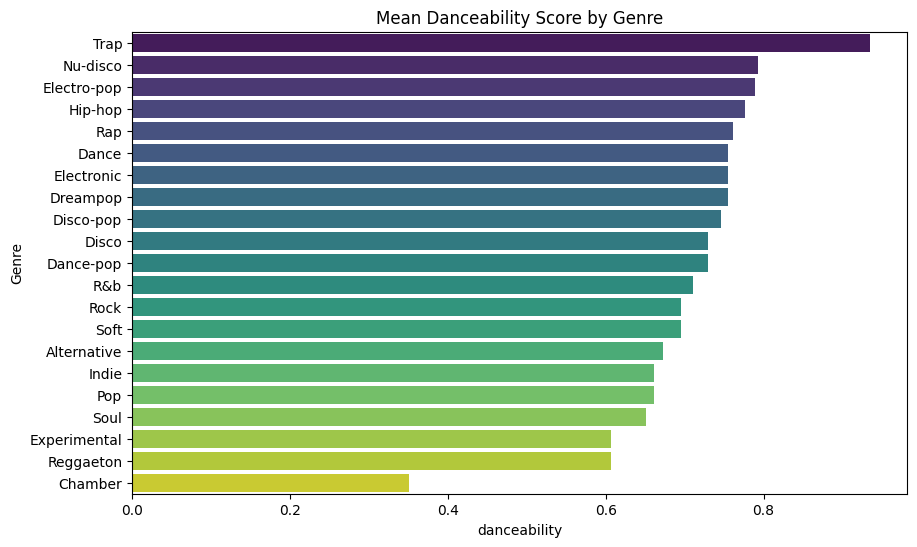

In [38]:
grouped_danceabilaty_data = exploded_data.groupby('genre')['danceability'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='danceability', y='genre', data=grouped_danceabilaty_data, hue='genre', palette='viridis', dodge=False)
plt.title('Mean Danceability Score by Genre')
plt.ylabel('Genre')
plt.show()

As its told in task, for future analysis we will use only specific genres, which are listed in code below as "selected_genre".

In [39]:
selected_genres = ['Pop', 'Hip-Hop', 'Rap', 'Dance', 'Electronic', 'Alternative','Indie']
exploded_data[exploded_data['genre'].isin(selected_genres)].groupby('genre')['danceability'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Alternative,6.0,0.673000,0.173714,0.459,0.5275,0.6955,0.81475,0.862
Dance,5.0,0.755000,0.094744,0.647,0.6740,0.7850,0.78900,0.880
Electronic,5.0,0.755000,0.094744,0.647,0.6740,0.7850,0.78900,0.880
Indie,4.0,0.661750,0.211107,0.459,0.4905,0.6630,0.83425,0.862
Pop,17.0,0.660706,0.127353,0.351,0.5970,0.6950,0.75900,0.806
Rap,14.0,0.760857,0.083964,0.598,0.7185,0.7705,0.82450,0.896


<span style="color:red; font-weight:bold;">By looking at description table above we can see that Hip-Hop, Rap, Dance, Electronic genres tend to have higher mean danceability scores and lower variability, while Alternative and Indie genres have lower mean danceability scores with higher variability. Pop falls in between, with a moderate mean and variability.</span>

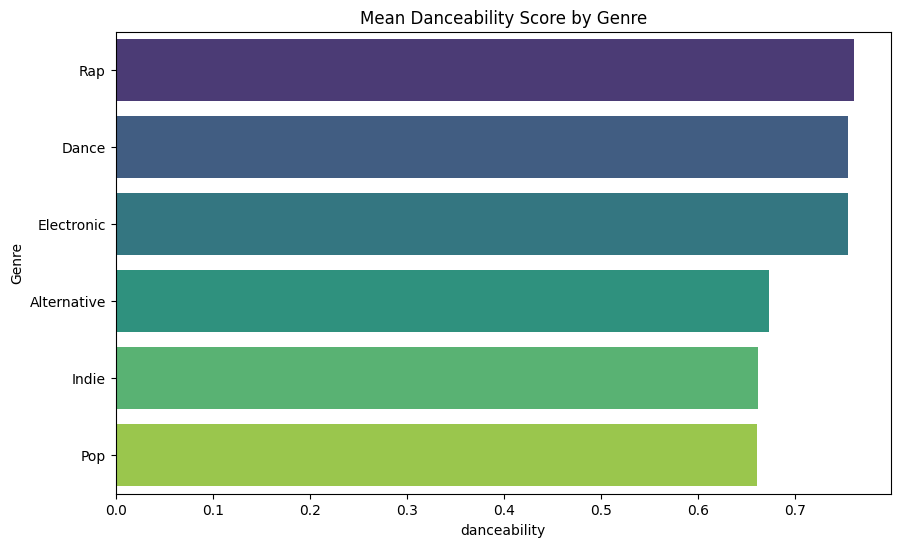

In [40]:
filtered_danceabilaty_data = grouped_danceabilaty_data[grouped_danceabilaty_data['genre'].isin(selected_genres)]

plt.figure(figsize=(10, 6))
sns.barplot(x='danceability', y='genre', data=filtered_danceabilaty_data, hue='genre', palette='viridis', dodge=False)
plt.title('Mean Danceability Score by Genre')
plt.ylabel('Genre')
plt.show()

### <center>How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?<center>

Code below does plots similar graph as above just for loudness. Also we are using absolute values to increase readabilaty.

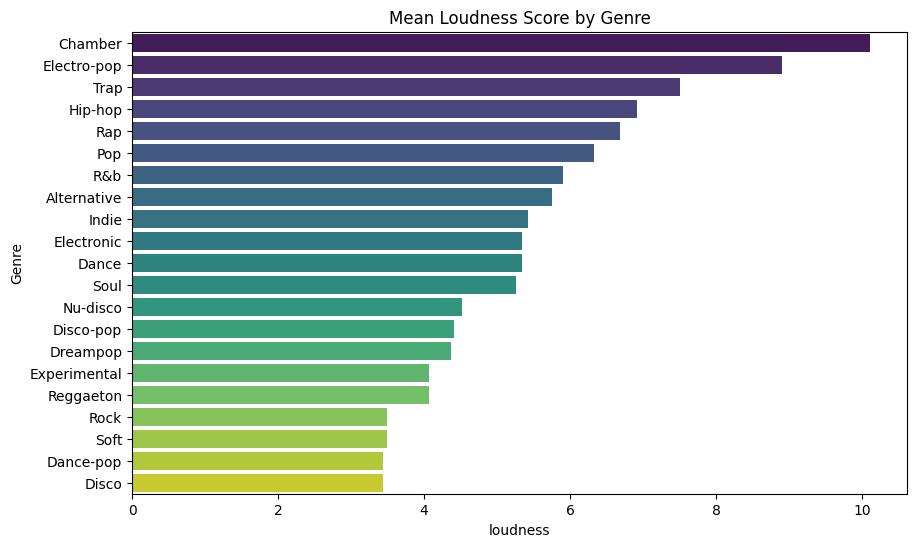

In [41]:
grouped_loudness_data = exploded_data.groupby('genre')['loudness'].mean().abs().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='loudness', y='genre', data=grouped_loudness_data, hue='genre', palette='viridis', dodge=False)
plt.title('Mean Loudness Score by Genre')
plt.ylabel('Genre')
plt.show()

In [42]:
exploded_data[exploded_data['genre'].isin(selected_genres)].groupby('genre')['loudness'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Alternative,6.0,-5.752333,1.677945,-8.756,-6.2205,-5.2685,-4.774,-4.074
Dance,5.0,-5.338000,1.479047,-7.567,-5.6520,-5.4570,-4.258,-3.756
Electronic,5.0,-5.338000,1.479047,-7.567,-5.6520,-5.4570,-4.258,-3.756
Indie,4.0,-5.421000,0.774502,-6.401,-5.8595,-5.2685,-4.830,-4.746
Pop,17.0,-6.329941,3.044926,-14.454,-7.2090,-6.6370,-3.675,-3.280
Rap,14.0,-6.677857,2.027303,-8.820,-8.3790,-7.2755,-5.349,-3.370


<span style="color:red; font-weight:bold;">Looking at data above we can say that Pop tends to have a wider range of loudness values with a higher mean, while Hip-Hop, Rap, Dance, Electronic genres have lower mean loudness with a more consistent loudness level. Alternative and Indie genres also have lower mean loudness values with moderate variability.</span>

### <center>How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?<center>

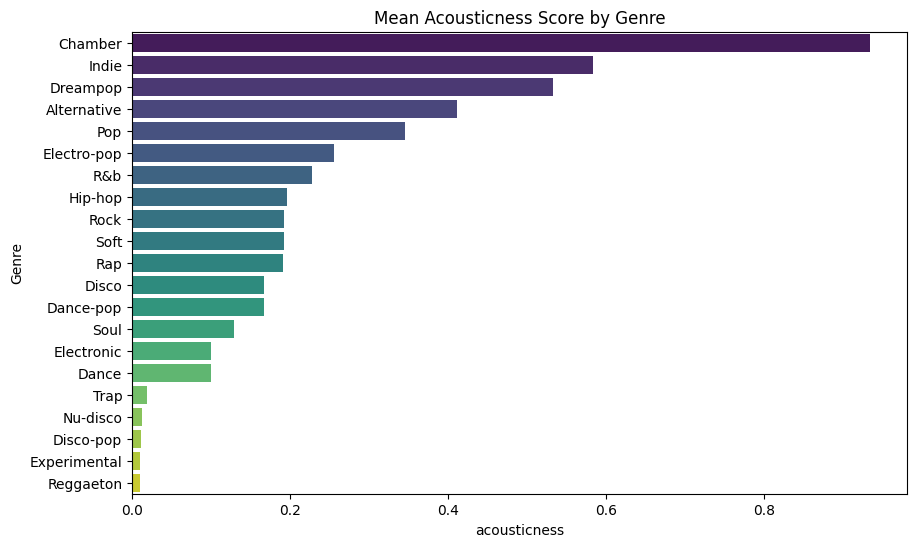

In [43]:
grouped_acousticness_data = exploded_data.groupby('genre')['acousticness'].mean().abs().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='acousticness', y='genre', data=grouped_acousticness_data, hue='genre', palette='viridis', dodge=False)
plt.title('Mean Acousticness Score by Genre')
plt.ylabel('Genre')
plt.show()

In [44]:
exploded_data[exploded_data['genre'].isin(selected_genres)].groupby('genre')['acousticness'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Alternative,6.0,0.411217,0.312244,0.01030,0.165000,0.4475,0.66700,0.751
Dance,5.0,0.099440,0.095828,0.01370,0.014900,0.0686,0.17700,0.223
Electronic,5.0,0.099440,0.095828,0.01370,0.014900,0.0686,0.17700,0.223
Indie,4.0,0.583500,0.204086,0.29100,0.525750,0.6460,0.70375,0.751
Pop,17.0,0.345929,0.326702,0.02100,0.122000,0.2230,0.34900,0.934
Rap,14.0,0.191045,0.179291,0.00513,0.071425,0.1760,0.23375,0.731


<span style="color:red; font-weight:bold;">Pop tends to have a wider range of acousticness values with a moderate mean, while Hip-Hop, Rap, Dance, Electronic genres have lower mean acousticness values with more consistent non-acoustic characteristics. Alternative and Indie genres have higher mean acousticness values with moderate variability.</span>

## <center>Suggestions for future works<center>

During this analysis only basic questions were asken and answered. As dataset is small and fixed to singular year, extremely extensive analysis isnt feasable, but its possible to make:
* Comparisons with rest of features.
* Filter songs by most popular artists (filter out artists with more than 1 top song and analyze individualy) and check if same artists songs are belonging to same ganre, thus giving insight if artist is popular or is genre hes playing.
* Check which song features are prominent in most popular artists songs, look for factors that put them apart from genre song belongs to.
* Expand dataset to include sales feature. There is possabilaty that most popular songs would have stronger correlation with specific features. 
* Expands presentation with graphs.